# Python e API

### O que é uma API?

- É um conjunto de códigos para usar um serviço/site/aplicativo específico. Cada site/ferramenta tem sua própria API. É importante que você saiba ler as APIs que precisar para saber usar

- Um dos padrões mais comuns em API é pegar informações em formato json, uma espécie de dicionário que precisa ser tratada no Python para podermos analisar

- As possibilidades de API são infinitas, vamos fazer 2 exemplos aqui: Cotação de Moedas e Envio de SMS.

- Sites como Google, Youtube, Facebook, Twitter, ArcGis e praticamente qualquer ferramenta/site grande tem uma API.

### O que precisamos:

- Quase sempre você precisa de uma conta para consumir uma API. Algumas APIs são abertas, como a https://docs.awesomeapi.com.br/api-de-moedas , mas em muitos casos  vamos precisar ter uma conta ativa para consumir a API.

- A Documentação da API (ou exemplos da internet) é a chave para conseguir usar uma API 

#### Pegar a Cotação Atual de Todas as Moedas 

In [2]:
import requests
import json


cotacoes = requests.get('https://economia.awesomeapi.com.br/json/all', verify = False)
cotacoes_dic = cotacoes.json()
print (cotacoes_dic)

{'USD': {'code': 'USD', 'codein': 'BRL', 'name': 'Dólar Americano/Real Brasileiro', 'high': '4.964', 'low': '4.9521', 'varBid': '-0.0023', 'pctChange': '-0.05', 'bid': '4.9537', 'ask': '4.9544', 'timestamp': '1708432202', 'create_date': '2024-02-20 09:30:02'}, 'USDT': {'code': 'USD', 'codein': 'BRLT', 'name': 'Dólar Americano/Real Brasileiro Turismo', 'high': '4.985', 'low': '4.955', 'varBid': '0.025', 'pctChange': '0.5', 'bid': '4.83', 'ask': '5.13', 'timestamp': '1708430760', 'create_date': '2024-02-20 09:06:00'}, 'CAD': {'code': 'CAD', 'codein': 'BRL', 'name': 'Dólar Canadense/Real Brasileiro', 'high': '3.6802', 'low': '3.6693', 'varBid': '0.0004', 'pctChange': '0.01', 'bid': '3.6754', 'ask': '3.6809', 'timestamp': '1708432119', 'create_date': '2024-02-20 09:28:39'}, 'GBP': {'code': 'GBP', 'codein': 'BRL', 'name': 'Libra Esterlina/Real Brasileiro', 'high': '6.2539', 'low': '6.2379', 'varBid': '0.0002', 'pctChange': '0', 'bid': '6.2435', 'ask': '6.2473', 'timestamp': '1708432108', 'c

c:\Users\G0022940\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'economia.awesomeapi.com.br'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


#### Qual foi a última cotação do Dólar, do Euro e do BitCoin? 

In [7]:
print('Dolar:{}'.format(cotacoes_dic['USD']['bid']))
print('Euro:{}'.format(cotacoes_dic['EUR']['bid']))
print('Bitcoin:{}'.format(cotacoes_dic['BTC']['bid']))

Dolar:4.9537
Euro:5.3505
Bitcoin:262320


#### Pegar a cotação dos últimos 30 dias do dólar.

In [17]:
cotacoes_dolar_30d = requests.get('https://economia.awesomeapi.com.br/json/daily/USD-BRL/30', verify = False)
cotacoes_dolar_dic = cotacoes_dolar_30d.json()
#print ('Dolar:{}'.format(cotacoes_dolar_dic[0]['bid']))
lista_cotacoes_dolar=[float(item['bid'])for item in cotacoes_dolar_dic]
print(lista_cotacoes_dolar)

[4.9632, 4.9564, 4.9665, 4.9668, 4.9732, 4.9735, 4.9536, 4.9536, 4.9536, 4.9517, 4.9512, 4.992, 4.9712, 4.9634, 4.9854, 4.9713, 4.9163, 4.9526, 4.9496, 4.9518, 4.9168, 4.917, 4.9165, 4.9335, 4.9535, 4.9892, 4.9295, 4.9294, 4.9349, 4.9255]


c:\Users\G0022940\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'economia.awesomeapi.com.br'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


#### Pegar as cotações do BitCoin de Jan/20 a Out/20

In [45]:
cotacoes_btc= requests.get('https://economia.awesomeapi.com.br/json/daily/BTC-BRL/310?start_date=20200101&end_date=20201031', verify = False)
cotacoes_btc_dic= cotacoes_btc.json()
lista_cotacoes_btc=[float(item['bid'])for item in cotacoes_btc_dic]
lista_cotacoes_btc.reverse()
print(lista_cotacoes_btc)
print(len(lista_cotacoes_btc))

[29140.1, 28200.6, 29776.1, 29761.0, 29650.0, 31313.3, 33049.1, 32800.2, 32172.0, 33200.2, 32897.0, 33050.0, 33384.4, 36210.0, 36781.0, 36471.8, 37104.3, 37273.1, 36400.0, 36604.0, 36820.0, 36500.0, 35216.0, 35649.1, 35177.2, 35891.2, 37158.0, 38870.0, 39101.0, 39991.0, 39601.0, 39660.0, 39376.0, 40690.0, 41690.0, 42285.0, 42590.0, 43786.8, 42771.0, 44219.2, 45110.0, 44520.1, 44660.5, 43201.0, 43390.0, 42400.4, 44220.1, 42910.0, 42450.0, 42870.9, 42772.1, 43726.2, 42722.1, 41800.0, 39650.7, 40000.0, 39356.8, 39001.9, 38750.0, 40100.1, 39602.1, 40100.7, 42101.0, 42300.0, 41453.1, 38612.5, 38100.2, 37200.1, 38429.9, 25800.0, 28150.0, 27050.0, 27935.0, 25715.6, 27100.0, 27669.4, 32011.0, 31820.1, 32084.3, 30879.8, 32605.1, 34155.0, 33801.0, 33890.9, 33050.0, 32142.5, 31000.0, 33000.1, 32577.9, 33510.6, 34550.7, 35600.0, 35601.3, 35320.4, 37655.2, 37250.0, 37720.1, 37255.2, 36007.0, 36360.0, 35800.0, 35750.0, 35150.0, 37025.0, 36836.7, 37415.0, 37158.0, 36652.1, 36800.0, 38000.1, 40050.0, 

c:\Users\G0022940\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'economia.awesomeapi.com.br'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


#### Gráfico com as cotações do BitCoin

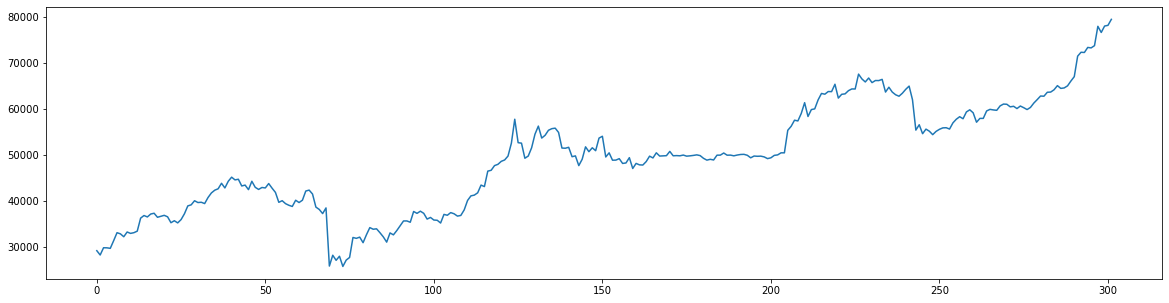

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(lista_cotacoes_btc)
plt.show()